In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score, classification_report

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv('dielectron.csv')
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [35]:
df.drop('Event', axis=1, inplace=True)
df.head()

,Run,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [36]:
df.dropna(inplace = True)

In [37]:
y = df['M']
X = df.drop('M', axis=1)

In [38]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=90125)

In [39]:
model = LGBMRegressor(random_state=91025).fit(train_X, train_y)
pred_y = model.predict(test_X)
model.score(test_X, test_y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3590
[LightGBM] [Info] Number of data points in the train set: 79932, number of used features: 17
[LightGBM] [Info] Start training from score 30.099905


0.9538436599955953

In [40]:
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print("RMSE test: %f" % (rmse))

RMSE test: 5.378713


In [41]:
test_y_df = pd.DataFrame({'Actual_Value': test_y.values})
pred_y_df = pd.DataFrame({'Predicted_Value': pred_y})
result_df = pd.concat([test_y_df, pred_y_df], axis=1)
result_df

,Actual_Value,Predicted_Value
0,25.64920,25.767613
1,21.69630,38.170235
2,7.22472,15.862214
3,30.98740,34.734797
4,41.47520,38.616487
...,...,...
19978,15.44750,14.556362
19979,54.42620,52.819295
19980,28.41820,19.109810
19981,21.96070,17.585162


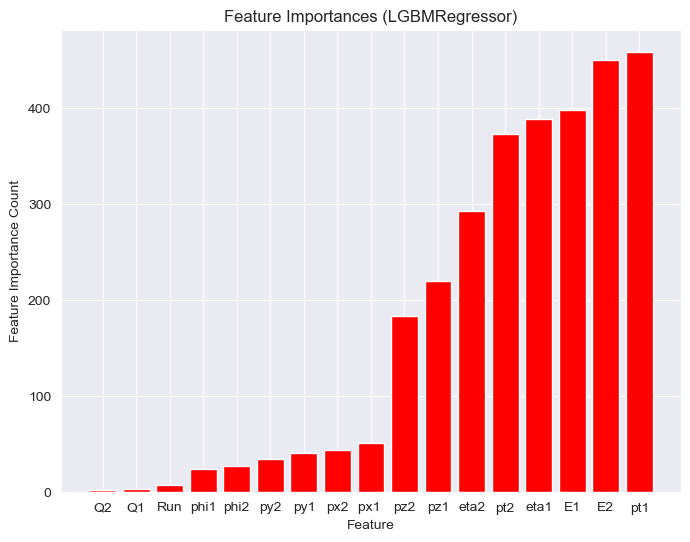

In [42]:
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='red')
plt.xlabel('Feature')
plt.ylabel('Feature Importance Count')
plt.title('Feature Importances (LGBMRegressor)')
plt.show()